In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module.  You may have this already, but if not it  can be installed with a simple:



In [1]:
# !pip install -r requirements.txt

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells when I last checked), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet with data for Uganda can be found at
[https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/](https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/)

This spreadsheet consists of three worksheets, labeled &ldquo;RDI&rdquo;, &ldquo;FCT&rdquo;,
&ldquo;Household Characteristics&rdquo;, &ldquo;Prices&rdquo;, and a series of different years of food &ldquo;Expenditures&rdquo;.

Each worksheet has the initial three columns labeled &ldquo;i&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;i&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (i,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of data and RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet for a given year should
have one column for each category of expenditures (e.g., &ldquo;Beans&rdquo;, &ldquo;Beef&rdquo;, &ldquo;Beer&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in these data:
namely numbers of different children by age and sex, along with the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Ugandan example that I wish to work
through.



In [2]:
Uganda_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'

With the spreadsheet defined , grab it and define a couple of
dataframes. (Sheets should be shared with `students@eep153.iam.gserviceaccount.com`):



In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Uganda_Data,sheet='Expenditures (2019-20)')
x.columns.name = 'j'
                 
# Change 'Uganda' to key of your own sheet in Sheets, above
d = read_sheets(Uganda_Data,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


This gives a dataframe of household characteristics $d$ with a simple structure.



In [4]:
d.head()

k                                                 Females 00-03  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    1.0   
                                 2019-20 Eastern            1.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    0.0   

k                                                 Females 04-08  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    0.0   
                                 2019-20 Eastern            0.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    1.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    1.0   

k                                                 Females 09-13  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    1.0   
                                 2019-20 Eastern            0.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    1.0   

k                                                 Females 14-18  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    3.0   
                                 2019-20 Eastern            3.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    0.0   

k                                                 Females 19-30  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    1.0   
                                 2019-20 Eastern            1.0   
02dd448165ce46279ca601a02865d543 2018-19                    1.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    0.0   

k                                                 Females 31-50  \
i                                t       m                        
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    0.0   
                                 2019-20 Eastern            0.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    1.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    1.0   

k                                                 Females 51-99  Males 00-03  \
i                                t       m                                     
00c9353d8ebe42faabf5919b81d7fae7 2018-19                    1.0          0.0   
                                 2019-20 Eastern            1.0          0.0   
02dd448165ce46279ca601a02865d543 2018-19                    0.0          0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                    0.0          0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                    0.0          0.0   

k                                                 Males 04-08  Males 09-13  \
i                                t       m                                   
00c9353d8ebe42faabf5919b81d7fae7 2018-19                  0.0          1.0   
                                 2019-20 Eastern          0.0          1.0   
02dd448165ce46279ca601a02865d543 2018-19                  0.0          0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19                  2.0          0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19                  0.0          1.0   

k                                                 Males 14-18  Males 19-

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [5]:
y.head()

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,8.188689,NaN,NaN,NaN,NaN,NaN,NaN,7.244228,NaN,8.699515,...,NaN,NaN,8.294050,5.298317,6.907755,NaN,NaN,NaN,8.006368,NaN
062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,6.907755,8.411833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,NaN,NaN,NaN,6.684612,NaN,NaN,NaN,NaN,NaN
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,7.937375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.070906,...,NaN,NaN,8.517193,5.298317,6.214608,NaN,NaN,NaN,NaN,NaN
1013000201,2019-20,Central,NaN,NaN,9.769956,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,7.600902,NaN,5.991465,7.649693,NaN,NaN,NaN,NaN,NaN


There may be some goods that very few people consume&#x2014;too few to estimate demand reliably.   We have code to deal with this.  You can play with the `min_obs` parameter&#x2014;the larger it is, the more foods will be dropped.



In [6]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


Now, we want the $d$ and $y$ dataframes to have rows that line up:



In [ ]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

## Estimation



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$
So, a first step is to turn our dataframe for `y` into a series, so we can put it on the left-hand side of this regression.  Then we need to make our dataframe $d$ conform:



In [7]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

### Basic Estimation



Just one line to set up the regression:



In [8]:
from cfe import Regression

result = Regression(y=y,d=d)

And then one line to predict expenditures and estimate most of the things we need:



In [9]:
result.predicted_expenditures()

i                                 t        m         j             
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans             3555.677276
                                                     Beef              8401.789558
                                                     Biscuits           842.091521
                                                     Bread             3077.266434
                                                     Cabbages          1199.255865
                                                                          ...     
e07bc322c4884559b4b8ca75c945dd3e  2019-20  Northern  Sweet Potatoes    6706.688800
                                                     Tea                201.911345
                                                     Tomatoes          1349.788766
                                                     Waragi            4423.328381
                                                     Yam               2839.871449
Length: 101010, dty

Now we can compare predicted log expenditures with actual:



<IPython.core.display.Javascript object>


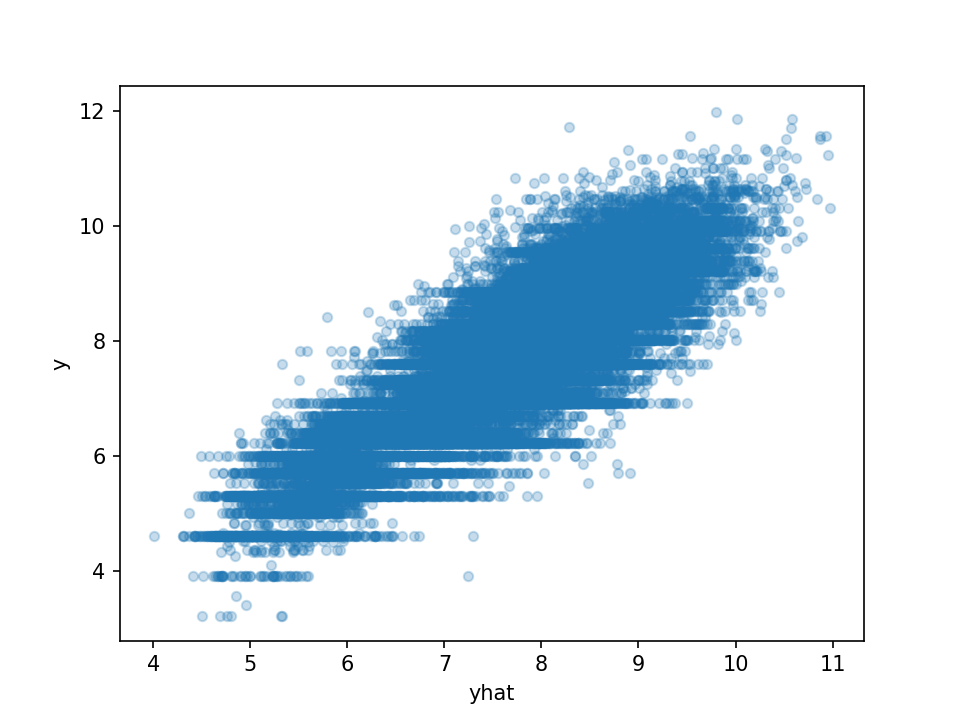

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [11]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y', alpha=0.25)

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.



### Parameters



#### (Relative) Income Elasticity



Some of the parameters have an interesting interpretation.  First among these are the $\beta$ coefficients, which govern how *income elastic* different goods are (higher values means more elastic).  These are also called *Frisch elasticities*.



In [12]:
result.get_beta().sort_values()

j
Cassava           0.089645
Salt              0.104366
Millet            0.163091
Peas              0.221420
Beans             0.229586
Dodo              0.231391
Waragi            0.234374
Onions            0.234774
Sweet Potatoes    0.248343
Eggs              0.259851
Matoke            0.270251
Fish (dried)      0.283041
Cabbages          0.286388
Tea               0.295146
Beef              0.298503
Maize             0.299072
Cooking Oil       0.299955
Pork              0.301544
Ground Nuts       0.311495
Tomatoes          0.330459
Yam               0.353646
Rice              0.356148
Mangos            0.366501
Kabalagala        0.392616
Sim Sim           0.398601
Other Veg.        0.407817
Sweet Bananas     0.433388
Soda              0.453436
Chapati           0.456309
Bread             0.465375
Oranges           0.484020
Other Fruits      0.491350
Milk (fresh)      0.542295
Biscuits          0.571134
Fish (fresh)      0.603296
Name: beta, dtype: float64

Here we use a plot to visualize, with confidence intervals.



<IPython.core.display.Javascript object>


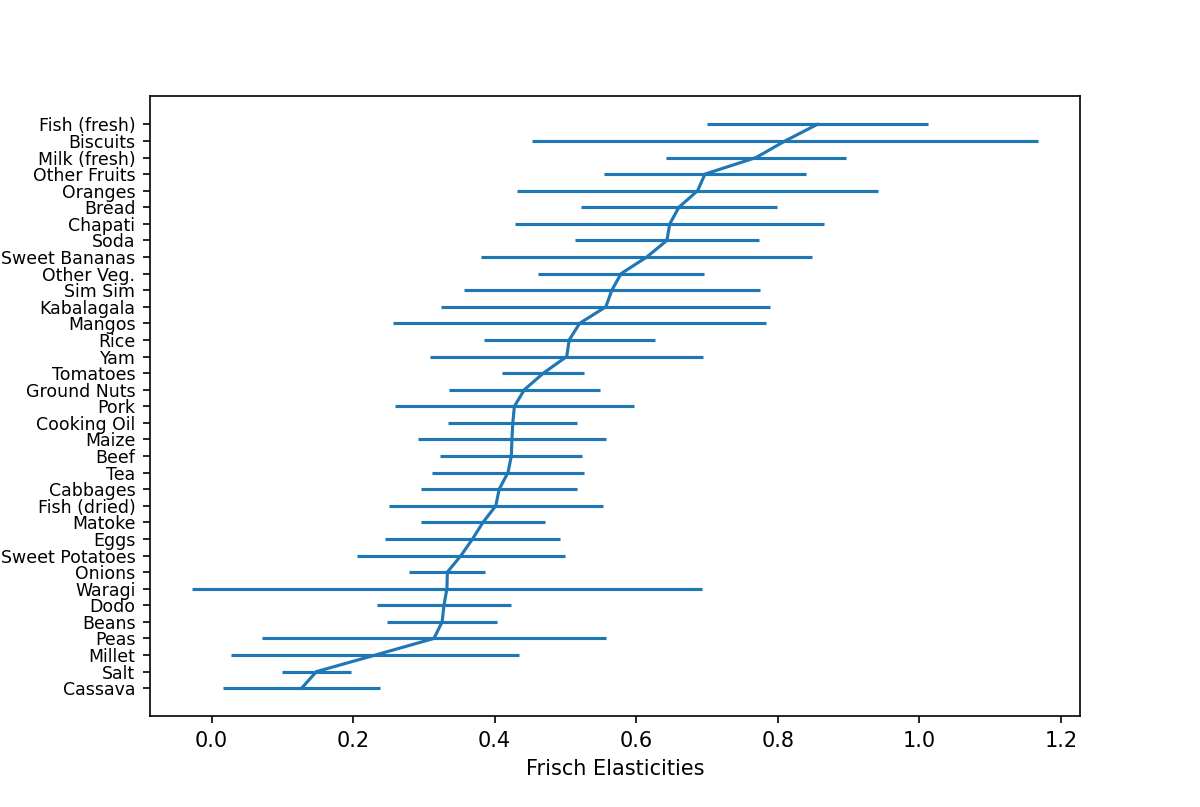

<IPython.core.display.Javascript object>


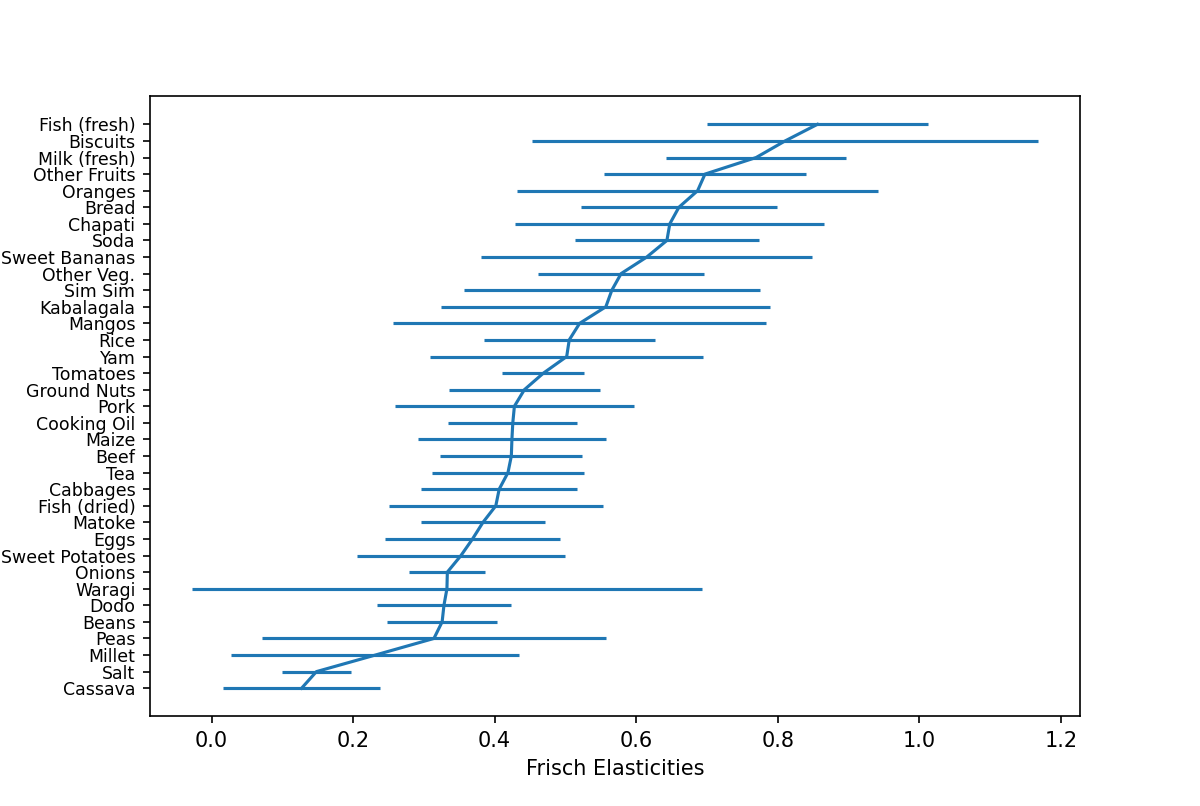

In [13]:
result.graph_beta()

#### Demand and Household Composition



We&rsquo;re particularly interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.



In [14]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.124336,0.035231,0.090377,0.004499,-0.007870,0.022907,0.102685,-0.042510,0.022145,0.064256,0.063150,0.041227,0.011180,0.114473,0.391925,-0.765806
Beef,-0.133073,0.012580,0.015526,0.014861,0.082507,0.061304,0.189160,-0.042146,0.021119,-0.009366,0.048574,0.077610,0.170483,0.171712,0.252517,-0.676754
Biscuits,0.038606,-0.000608,-0.026963,0.101941,0.015177,0.244867,0.289385,0.243284,0.039812,-0.050499,-0.058406,0.046866,0.170904,-0.127918,-0.075380,-0.409758
Bread,-0.064686,0.027238,-0.092955,-0.008487,0.061894,0.057456,0.084374,-0.128560,0.073478,-0.041311,-0.019199,0.013019,0.074366,0.078168,0.398146,-0.751295
Cabbages,0.007378,-0.058572,0.029930,0.037955,-0.026252,0.036936,0.081504,-0.045031,0.033217,0.013162,0.042502,0.069609,0.030480,0.068790,0.232485,-0.513702
Cassava,0.019206,0.089485,0.105922,0.042049,-0.004145,0.072680,0.156273,-0.003705,0.134056,0.186236,0.135270,0.062836,0.098303,0.118365,0.148453,-0.711646
Chapati,-0.034054,-0.008517,0.065749,0.090993,0.023017,0.006971,-0.090070,0.007639,0.082807,-0.036377,-0.016584,0.067900,0.093947,0.153264,0.162986,-0.412577
Cooking Oil,-0.088741,-0.050446,-0.052850,0.011923,0.028813,0.017072,-0.079372,-0.086822,-0.083002,-0.041623,-0.007363,-0.034479,0.005265,0.052592,0.418256,-0.517449
Dodo,-0.083900,-0.011246,0.091461,0.040517,0.049264,0.073878,0.182246,-0.021156,0.021386,0.088145,-0.009156,0.044575,0.063169,0.162541,0.170590,-0.539539


### Saving Result



You can save the estimated result, using something like



In [1]:
result.to_pickle('my_estimates.pickle')

You can subsequently load this using



In [1]:
import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')